In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from scikitplot.metrics import plot_roc
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from collections import Counter
import copy

from scikitplot.metrics import plot_roc, plot_precision_recall


# Data Preparation

In [2]:
#importo il train e test encoded (sto importando quelli GIÀ ONE HOT ENCODED)
df_train = pd.read_csv('df_train_mod2.csv')
df_test = pd.read_csv('df_test_mod2.csv')

#Prendo la variabile target, in questo caso emotion:
y_train = df_train['emotion']
y_test = df_test['emotion']

#tolgo emotion visto che l'ho salvata nella y - IMPORTANTE!
df_train.drop(columns=['emotion'],inplace=True)
df_test.drop(columns=['emotion'],inplace=True)

In [3]:
columns_to_scale_train = df_train.iloc[:, :-5]
columns_to_scale_test = df_test.iloc[:, :-5]


# Extract the columns to be kept as they are
columns_to_keep_train = df_train.iloc[:, -5:]
columns_to_keep_test = df_test.iloc[:, -5:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns to be scaled
scaler.fit(columns_to_scale_train) #faccio il fit solo sulle colonne del train!
train_scaled = scaler.transform(columns_to_scale_train)
test_scaled = scaler.transform(columns_to_scale_test)


# Concatenate the scaled columns and the columns to be kept
df_train = pd.concat([pd.DataFrame(train_scaled, columns=columns_to_scale_train.columns), columns_to_keep_train], axis=1)
df_test = pd.concat([pd.DataFrame(test_scaled, columns=columns_to_scale_test.columns), columns_to_keep_test], axis=1)

In [4]:
# Salvo in x_train e x_test i valori 
x_train = df_train.values
x_test = df_test.values

# Logistic Regression

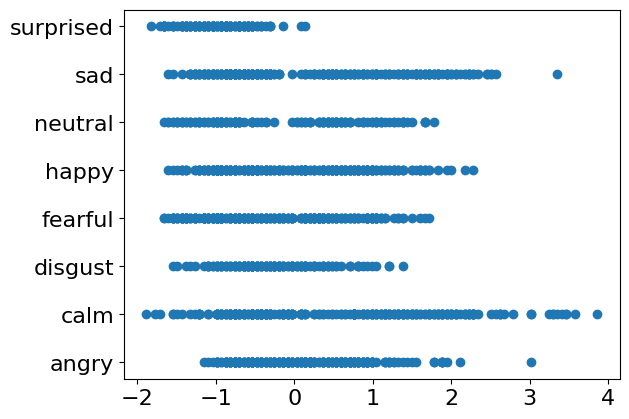

In [5]:
# viene generato un grafico a dispersione utilizzando la funzione plt.scatter() 
# per visualizzare la distribuzione dei punti con le variabili di addestramento X_train.T[0] sull'asse x 
# e la variabile target y_train sull'asse y.

plt.scatter(x_train.T[0], y_train)
labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plt.yticks(range(len(labels)), labels)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Questo grafico rappresenta la distribuzione generale dei punti del X_train facendo riferimento a ciascuna classe/etichetta.

### LR generica/base, utilizzando tutte le 237 features
Iniziamo quindi ad allenare un semplice LogisticRegressor() con i parametri di default, prendendo come features tutte quante.

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.4358974358974359
F1-score [0.56888889 0.53588517 0.47457627 0.41975309 0.31746032 0.42352941
 0.25641026 0.42307692]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        96
           1       0.50      0.58      0.54        96
           2       0.40      0.58      0.47        48
           3       0.52      0.35      0.42        96
           4       0.32      0.31      0.32        96
           5       0.49      0.38      0.42        48
           6       0.33      0.21      0.26        96
           7       0.39      0.46      0.42        48

    accuracy                           0.44       624
   macro avg       0.43      0.44      0.43       624
weighted avg       0.43      0.44      0.42       624



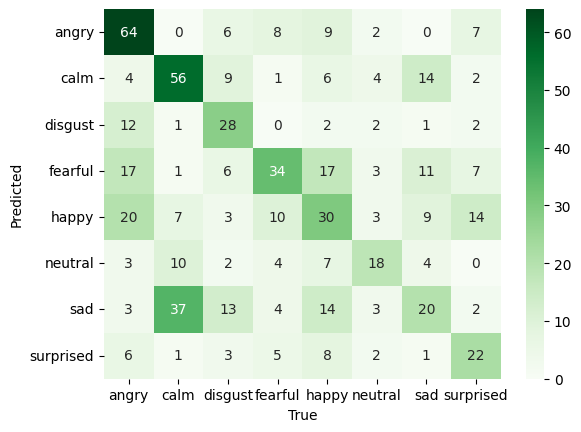

In [6]:
# eseguo la LR su tutto quante le features che ho, ovvero tutto l'X_train che ha shape (1261, 237) 
# e quindi sto considerando le 237 features

from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# DEFAULT C=1.0, penalty='l2', solver='lbfgs'
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# clf.fit(X_train.T[0].reshape(-1,1), y_train) # Addestro il modello solamente sulla prima features, quindi 1 sola
# y_pred = clf.predict(X_test.T[0].reshape(-1,1)) # con 1 sola feature

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# plot della CONFUSION MATRIX 
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [7]:
print('clf.intercept_', clf.intercept_)

print('clf.coef_', clf.coef_)

clf.intercept_ [ 1.80412642 -1.65455108 -1.87395317  4.01739294  1.36566239 -0.48457804
 -0.13398666 -3.0401128 ]
clf.coef_ [[ 0.34869169 -0.02626916  0.83790347 ...  1.14347001 -0.47428459
  -0.4209248 ]
 [-0.10982551  0.25512963 -1.51166742 ... -0.55268855  0.21607292
  -2.53889541]
 [ 0.10055421 -0.00498259 -0.29800971 ...  0.16688431  0.21315003
  -1.08703785]
 ...
 [-0.4239623  -0.17887546 -0.36059957 ... -0.25722494  0.23082168
  -0.41045327]
 [ 0.31009749 -0.2365533   0.26366947 ...  0.04036197  0.15608973
   1.69478101]
 [-0.30643779  0.21038279 -0.52235216 ...  0.40657243  0.11909868
   0.25724016]]


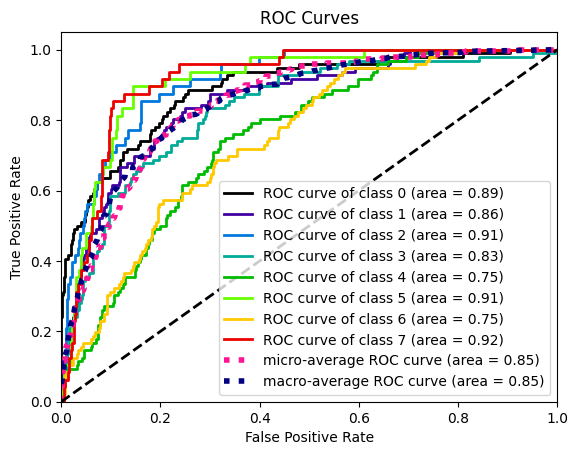

0.8515000263047138


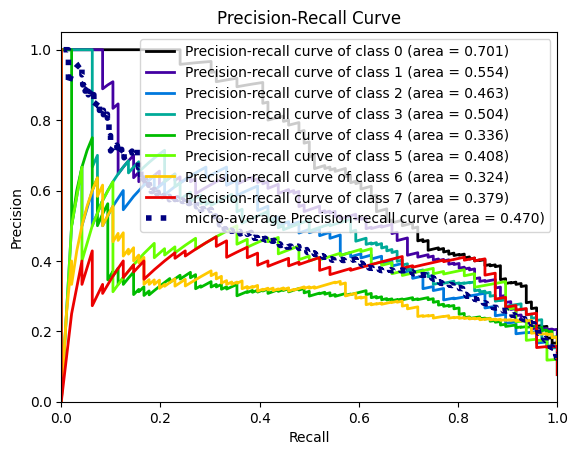

In [8]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# ROC CURVE, anche se linearSVM non ha la predict_proba
y_pred_proba = clf.predict_proba(x_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(x_test), )
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(x_test))
plt.show()

In [9]:
'''
from scipy.special import expit

loss = expit(sorted(x_test.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(x_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(x_train.T[0].reshape(-1,1), y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show() 
'''


"\nfrom scipy.special import expit\n\nloss = expit(sorted(x_test.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()\nplt.plot(sorted(x_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)\nplt.scatter(x_train.T[0].reshape(-1,1), y_train)\n#plt.xlabel(selected_columns[0], fontsize=16)\n#plt.ylabel('Occupancy', fontsize=16)\nplt.tick_params(axis='both', which='major', labelsize=16)\nplt.show() \n"

#### Posso effettuare una grid search per vedere quale è la migliore configurazione con i parametri scelti

In [10]:
# Crea un oggetto LogisticRegressor
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga']
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''
Migliori parametri:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Miglior score:  0.5812943095551791
'''

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_mode

Migliori parametri:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Miglior score:  0.4922006771314251


"\nMigliori parametri:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}\nMiglior score:  0.5812943095551791\n"

Accuracy 0.46634615384615385
F1-score [0.63888889 0.57407407 0.51515152 0.42105263 0.36548223 0.34482759
 0.28368794 0.42990654]
              precision    recall  f1-score   support

       angry       0.57      0.72      0.64        96
        calm       0.52      0.65      0.57        96
     disgust       0.40      0.71      0.52        48
     fearful       0.57      0.33      0.42        96
       happy       0.36      0.38      0.37        96
     neutral       0.38      0.31      0.34        48
         sad       0.44      0.21      0.28        96
   surprised       0.39      0.48      0.43        48

    accuracy                           0.47       624
   macro avg       0.46      0.47      0.45       624
weighted avg       0.47      0.47      0.45       624



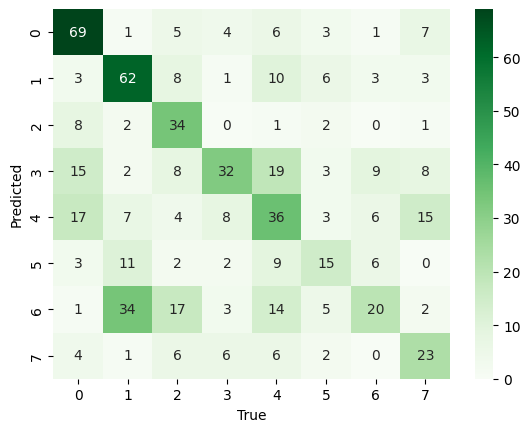

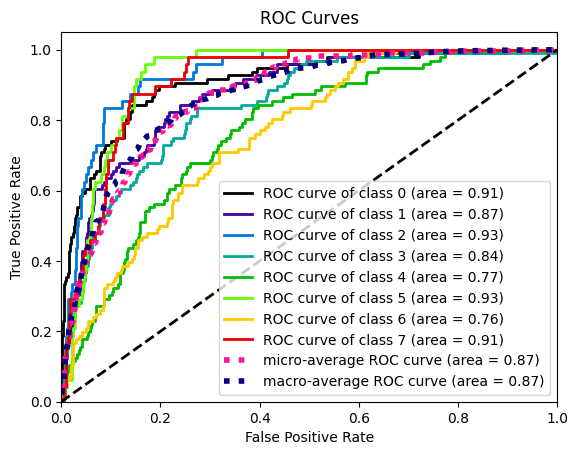

0.8664826158722643


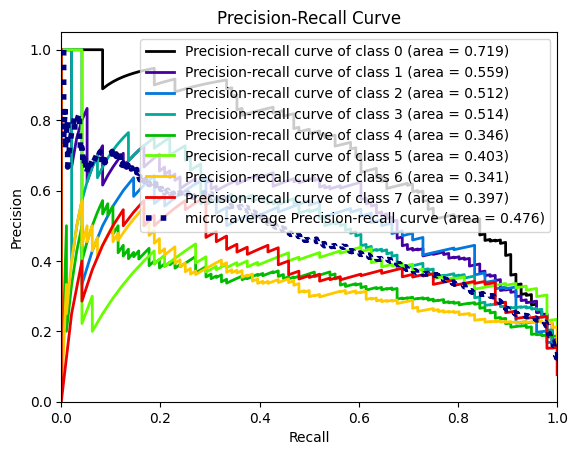

In [11]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

clf = grid_search.best_estimator_
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC CURVE
y_pred_proba = clf.predict_proba(x_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(x_test))

plt.show()

## Features Selection

Le features che utilizzo sono quelle che sono state mantenute nelle tecniche di dimensionality reduction effettuate in precedenza. 

Ora attraverso diverse tecniche provo a vedere quali sono quelle che mi fanno ottenere un risultato migliore per la selezione:

- 01. prima tramite i coeffcienti
- 02. tramite regolarizzazione L1 
- 03. tramite Recursive Feature Selection (RFE), che è una tecnica di dimensionality reduction 

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined a

[ 13 212  16  28  73  90 144  65]
Features selezionate:  [ 13 212  16  28  73  90 144  65]
Accuracy: 0.22435897435897437
F1-score: 0.2011173214005162
Classification Report:
               precision    recall  f1-score   support

       angry       0.27      0.52      0.35        96
        calm       0.27      0.27      0.27        96
     disgust       0.15      0.06      0.09        48
     fearful       0.19      0.12      0.15        96
       happy       0.18      0.23      0.20        96
     neutral       0.00      0.00      0.00        48
         sad       0.22      0.22      0.22        96
   surprised       0.15      0.12      0.14        48

    accuracy                           0.22       624
   macro avg       0.18      0.19      0.18       624
weighted avg       0.20      0.22      0.20       624



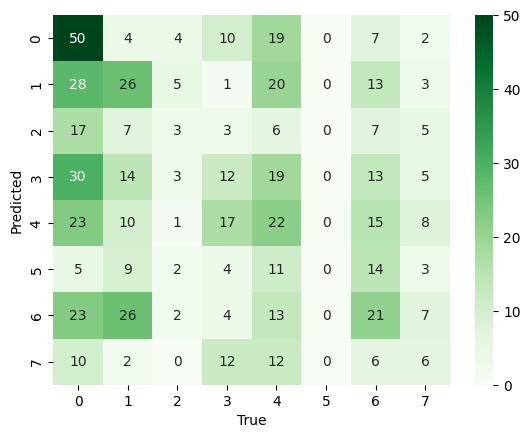

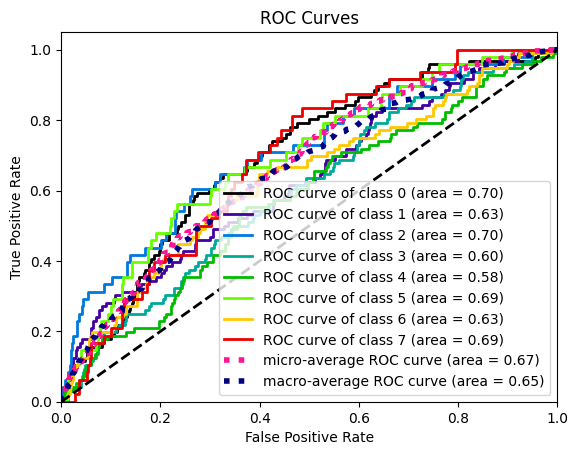

0.6530621974957912


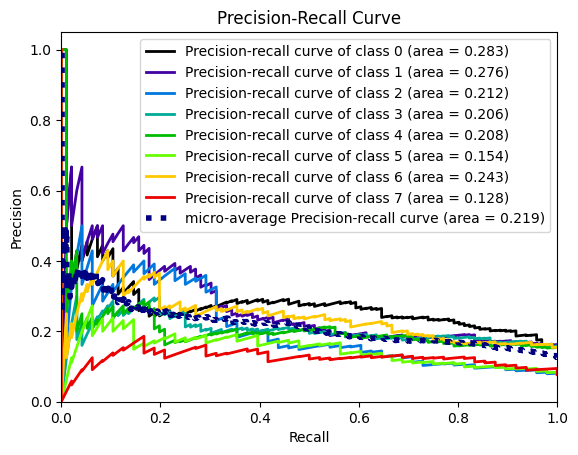

In [12]:
'''
01. Feature Importance con regressione logistica: 

Puoi addestrare una regressione logistica sul dataset completo e utilizzare la misura di importanza delle caratteristiche 
restituita dal modello per selezionare le features più rilevanti. 
Puoi utilizzare l'attributo coef_ del modello per ottenere i coefficienti delle features e selezionare le più significative 
in base ai valori assoluti dei coefficienti.
'''

clf = LogisticRegression(random_state=42, C= 0.1, penalty='l2', solver='lbfgs')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

coefficients = clf.coef_ 

# Calcola i valori assoluti dei coefficienti
abs_coefficients = abs(coefficients)

# Ordina i valori assoluti dei coefficienti in ordine decrescente
sorted_indices = abs_coefficients.argsort()[::-1]

# Seleziona le prime k features migliori
k = 50
top_k_features = sorted_indices[:, k]
print(top_k_features)

# Stampa le features selezionate
selected_features = top_k_features
print("Features selezionate: ", selected_features)

# Seleziona solo le k features migliori
X_train_selected = x_train[:, selected_features]
X_test_selected = x_test[:, selected_features]

# Addestra il modello di regressione logistica sulle features selezionate
clf.fit(X_train_selected, y_train)

# Fai le previsioni sulle variabili di test
y_pred = clf.predict(X_test_selected)

# Calcola l'accuratezza delle previsioni
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred, target_names=labels)

# Stampa le metriche di valutazione
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", classification_rep)

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC CURVE
y_pred_proba = clf.predict_proba(X_test_selected)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test_selected))
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(X_test_selected))

plt.show()

In [13]:
''' 
02. L1 regularization (Regolarizzazione L1) con regressione logistica: 

L'utilizzo della regolarizzazione L1 nella regressione logistica incoraggerà automaticamente il modello a selezionare
le caratteristiche più informative, poiché il termine di regolarizzazione basato sulla norma L1 tende a rendere 
i coefficienti delle caratteristiche meno rilevanti pari a zero. 
Questo ti permette di ottenere un insieme sparso di caratteristiche significative.
    
--> forzo quindi a vedere le prestazioni migliori utilizzando la regolarizzazione L1
'''

clf = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1'],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga']
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''
Migliori parametri:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Miglior score:  0.579735240604806
'''

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_mode

Migliori parametri:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Miglior score:  0.4922006771314251


"\nMigliori parametri:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}\nMiglior score:  0.579735240604806\n"

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
Accuracy 0.46634615384615385
F1-score [0.63888889 0.57407407 0.51515152 0.42105263 0.36548223 0.34482759
 0.28368794 0.42990654]
              precision    recall  f1-score   support

       angry       0.57      0.72      0.64        96
        calm       0.52      0.65      0.57        96
     disgust       0.40      0.71      0.52        48
     fearful       0.57      0.33      0.42        96
       happy       0.36      0.38      0.37        96
     neutral       0.38      0.31      0.34        48
         sad       0.44      0.21      0.28        96
   surprised       0.39      0.48      0.43        48

    accuracy                           0.47       624
   macro avg       0.46      0.47      0.45       624
weighted avg       0.47      0.47      0.45       624



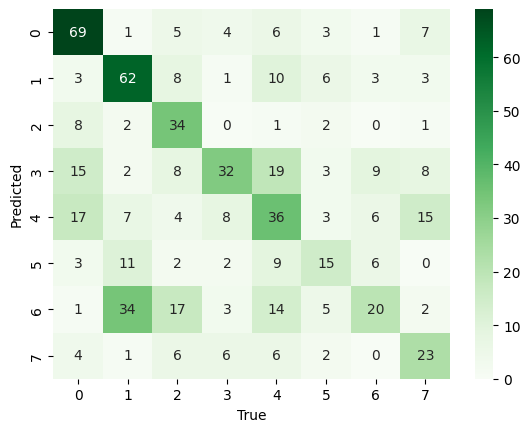

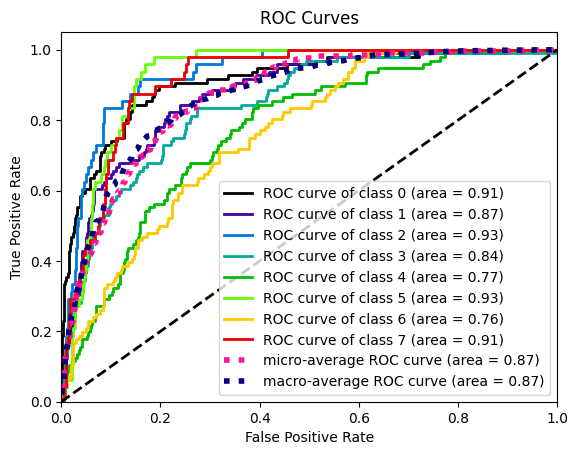

0.8664826158722643


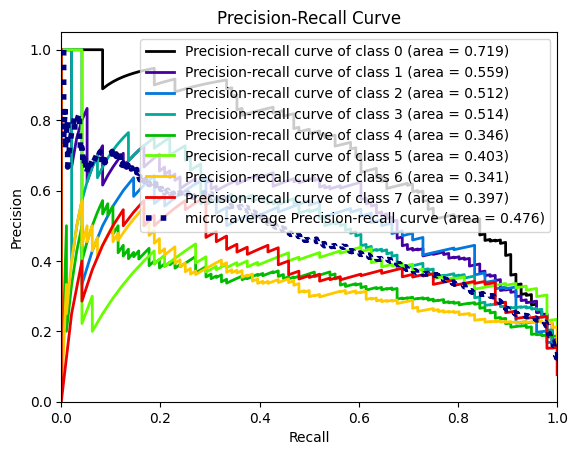

In [14]:
clf = grid_search.best_estimator_
print(clf)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC CURVE
y_pred_proba = clf.predict_proba(x_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(x_test))

plt.show()

In [15]:
'''
03. Recursive Features Selection (RFE) 

Recursive Feature Elimination (RFE) con regressione logistica: 
Puoi utilizzare l'algoritmo RFE insieme alla regressione logistica per selezionare le features più rilevanti. 
L'RFE eliminerà iterativamente le caratteristiche meno informative e la regressione logistica verrà addestrata sui subset di 
features ridotti fino a raggiungere un numero desiderato di caratteristiche.

'''

"\n03. Recursive Features Selection (RFE) \n\nRecursive Feature Elimination (RFE) con regressione logistica: \nPuoi utilizzare l'algoritmo RFE insieme alla regressione logistica per selezionare le features più rilevanti. \nL'RFE eliminerà iterativamente le caratteristiche meno informative e la regressione logistica verrà addestrata sui subset di \nfeatures ridotti fino a raggiungere un numero desiderato di caratteristiche.\n\n"

Faccio un po' di testing delle features per vedere quali sono migliori numero da avere, in modo da utilizzarle poi nell'algoritmo più avanti 

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Risultati delle metriche:
Numero di features selezionate: 45
Accuracy: 0.47596153846153844
F1-score: 0.4574290117556177
AUC: 0.8421565413752913

Numero di features selezionate: 50
Accuracy: 0.46153846153846156
F1-score: 0.4424907544546532
AUC: 0.8434386432433306

Numero di features selezionate: 55
Accuracy: 0.46314102564102566
F1-score: 0.4457921188453228
AUC: 0.8411271165177414

Numero di features selezionate: 60
Accuracy: 0.46634615384615385
F1-score: 0.44908807380028787
AUC: 0.8429173546361045

Numero di features selezionate: 65
Accuracy: 0.4855769230769231
F1-score: 0.4678458781843822
AUC: 0.8435137634356383

Numero di features selezionate: 70
Accuracy: 0.46634615384615385
F1-score: 0.442159592410853
AUC: 0.8442786235754985



/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


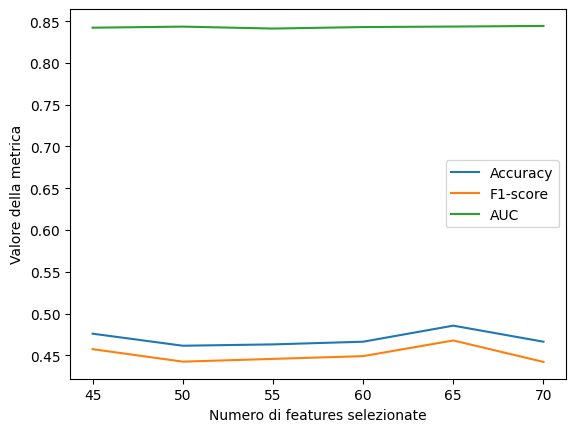

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Crea un oggetto regressore logistico
clf = LogisticRegression(random_state=42, solver='lbfgs', C=1.0, penalty='l2')

# Lista dei valori di features da testare
n_features_values = [45, 50, 55, 60, 65, 70]

# Dizionari per salvare i risultati delle metriche
accuracy_scores = {}
f1_scores = {}
auc_scores = {}

for n_features in n_features_values:
    # Crea un oggetto RFE con il regressore logistico come stimatore
    rfe = RFE(estimator=clf, n_features_to_select=n_features)

    # Esegui la feature selection
    X_train_selected = rfe.fit_transform(x_train, y_train)
    X_test_selected = rfe.transform(x_test)

    # Addestra il modello di regressione logistica sulle features selezionate
    clf.fit(X_train_selected, y_train)

    # Fai le previsioni sulle variabili di test
    y_pred = clf.predict(X_test_selected)

    # Calcola le metriche di valutazione
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, clf.predict_proba(X_test_selected), multi_class='ovr', average='weighted')

    # Salva le metriche nei dizionari
    accuracy_scores[n_features] = accuracy
    f1_scores[n_features] = f1
    auc_scores[n_features] = auc

# Stampa i risultati delle metriche
print("Risultati delle metriche:")
for n_features in n_features_values:
    print("Numero di features selezionate:", n_features)
    print("Accuracy:", accuracy_scores[n_features])
    print("F1-score:", f1_scores[n_features])
    print("AUC:", auc_scores[n_features])
    print()

# Plot dei risultati
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()), label='Accuracy')
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), label='F1-score')
plt.plot(list(auc_scores.keys()), list(auc_scores.values()), label='AUC')
plt.xlabel('Numero di features selezionate')
plt.ylabel('Valore della metrica')
plt.legend()
plt.show()


/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Indici delle features selezionate: [False False  True False False  True False False False  True False False
 False False False False  True  True  True  True False False  True  True
  True False  True  True False False False False False False False False
 False False  True False False  True False False False  True False  True
 False False False False False False False False False False False False
  True False False  True False False False False  True False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False False  True False False  True  True False  True  True
  True  True False  True  True False  True False  True False False False
 False  True  True  True False False False  True False  True False False
 False False  True False False  True False  True False False False False
  True  True Fal

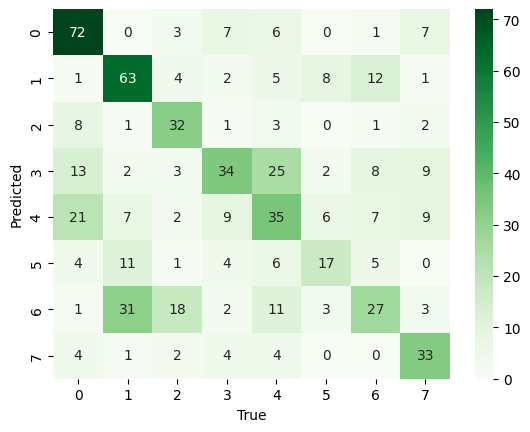

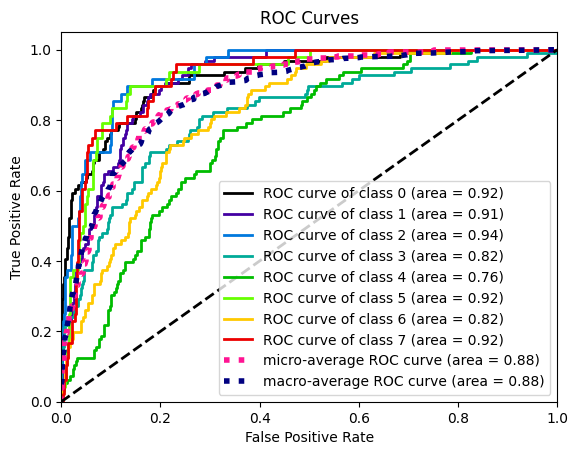

0.8776292383470118


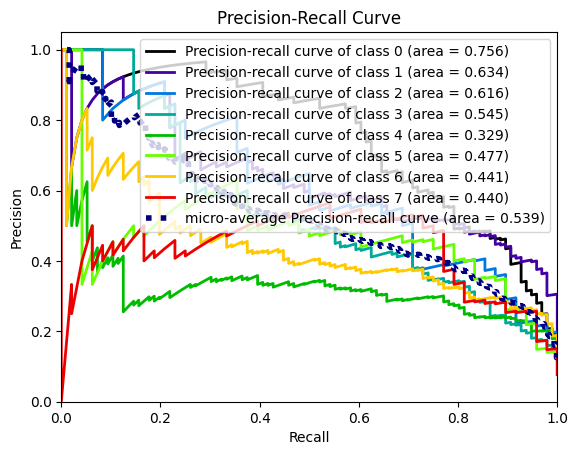

In [9]:
# eseguo il codice con il numero di features scelto: 65 FEATURES SONO MIGLIORI

from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# parto da un classificatore normale, prendedo quello che è venuto meglio con i parametri 
clf = LogisticRegression(random_state=42, C=0.1, penalty='l2', solver="lbfgs")
rfe = RFE(estimator=clf, n_features_to_select=65)

# Esegui la feature selection
X_train_selected = rfe.fit_transform(x_train, y_train)
X_test_selected = rfe.transform(x_test)

# Ottieni gli indici delle features selezionate
selected_feature_indices = rfe.support_
print("Indici delle features selezionate:", selected_feature_indices)

# Addestra il modello di regressione logistica sulle features selezionate
clf.fit(X_train_selected, y_train)

# Fai le previsioni sulle variabili di test
y_pred = clf.predict(X_test_selected)

# Calcola l'accuratezza delle previsioni
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC CURVE
y_pred_proba = clf.predict_proba(X_test_selected)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test_selected))
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(X_test_selected))
plt.show()

## Example Slides

In [18]:
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 
                  2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 
                  4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)
exam_passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

clf = LogisticRegression(random_state=0)
clf.fit(hours, exam_passed.ravel())

print(clf.coef_)
print(clf.intercept_)

clf.predict(np.array([2.5, 8.0]).reshape(-1,1))
clf.predict_proba(np.array([2.5, 8.0]).reshape(-1,1))

def proba(x, beta0, beta1):
    return 1/(1+np.e**(-(beta1 * x + beta0)))

print((0, clf.intercept_[0], clf.coef_[0][0]))
print((2.5, clf.intercept_[0], clf.coef_[0][0]))
print((8, clf.intercept_[0], clf.coef_[0][0]))

x = 1

print('Log-odds of passing exam', clf.coef_[0][0] * x + clf.intercept_[0])
print('Odds of passing exam', np.e**(clf.coef_[0][0] * x + clf.intercept_[0]))

print(proba(0.5, clf.intercept_[0], clf.coef_[0][0]))
print((1, clf.intercept_[0], clf.coef_[0][0]))
print((2, clf.intercept_[0], clf.coef_[0][0]))
print((3, clf.intercept_[0], clf.coef_[0][0]))

print(np.e**(clf.coef_[0][0]))

print(proba(2, -4.0777, 1.5046))
print(proba(3, -4.0777, 1.5046))
print(proba(4, -4.0777, 1.5046))

print(np.e**1.5046)
print(np.e**(1.5046 * 3 -4.0777)/np.e**(1.5046 * 2 -4.0777))
print(np.e**(1.5046 * 4 -4.0777)/np.e**(1.5046 * 3 -4.0777))
print(np.e**(1.5046 * 5 -4.0777)/np.e**(1.5046 * 4 -4.0777))
print(np.e**(1.5046 * 4 -4.0777)/np.e**(1.5046 * 2 -4.0777))

print(np.e**1.5046 * np.e**1.5046)

clf = LogisticRegression(max_iter=100)
clf.fit(x_train, y_train)

print(clf.intercept_)
print(clf.coef_)

y_pred = clf.predict(x_test)
print(y_pred)

print(classification_report(y_pred, y_test))

[[1.14860386]]
[-3.13952411]
(0, -3.139524107073134, 1.1486038646145322)
(2.5, -3.139524107073134, 1.1486038646145322)
(8, -3.139524107073134, 1.1486038646145322)
Log-odds of passing exam -1.9909202424586019
Odds of passing exam 0.1365696903733814
0.07141047851885018
(1, -3.139524107073134, 1.1486038646145322)
(2, -3.139524107073134, 1.1486038646145322)
(3, -3.139524107073134, 1.1486038646145322)
3.1537867213478554
0.25568844734059615
0.6073293474722868
0.8744290256656763
4.502352329120619
4.502352329120619
4.502352329120619
4.502352329120619
20.271176495537862
20.271176495537862
[ 1.80412642 -1.65455108 -1.87395317  4.01739294  1.36566239 -0.48457804
 -0.13398666 -3.0401128 ]
[[ 0.34869169 -0.02626916  0.83790347 ...  1.14347001 -0.47428459
  -0.4209248 ]
 [-0.10982551  0.25512963 -1.51166742 ... -0.55268855  0.21607292
  -2.53889541]
 [ 0.10055421 -0.00498259 -0.29800971 ...  0.16688431  0.21315003
  -1.08703785]
 ...
 [-0.4239623  -0.17887546 -0.36059957 ... -0.25722494  0.23082168


/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
